<a href="https://colab.research.google.com/github/pedrogava/Machine_Learning_Project/blob/main/Projeto_Machine_Learning_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Machine Learning

### Exemplo com Variaveis para entender a lógica de aprendizado supervisionado`

In [191]:
porco1 =[0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

# classes -> porco - 1 / cahorro - 0
treino_x = [porco1,porco2,porco3,cachorro1,cachorro2,cachorro3]
treino_y = [1,1,1,0,0,0]

In [192]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)

LinearSVC()

In [193]:
animal_misterioso = [1,0,1]
modelo.predict([animal_misterioso])

array([0])

In [194]:
mistério1 = [1,1,1]
mistério2 = [0,0,0]
mistério3 = [0,1,1]
testes_x = [mistério1,mistério2,mistério3]
previsões = modelo.predict(testes_x)


In [195]:
testes_y = [0,1,0]

In [196]:
# Numero de acertos do modelo
acertos = (previsões == testes_y).sum()
total = len(testes_x)
taxa_de_acerto= acertos/total*100
taxa_de_acerto
print(f'Acuracia: {taxa_de_acerto}')

Acuracia: 100.0


In [197]:
from sklearn.metrics import accuracy_score
taxa_de_acerto = accuracy_score(testes_y,previsões)*100
print(f'Acuracia: {taxa_de_acerto}')

Acuracia: 100.0


### Utilizando bases maiores como exemplos para ter resultados de um ambiente menos controlado.

In [198]:
import pandas as pd
dados = pd.read_csv("tracking.csv")
dados.head()

,inicial,palestras,contato,comprou,patrocinio
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0


In [199]:
y=dados["comprou"]
y.head()

,comprou
0,0
1,0
2,0
3,0
4,0


In [200]:
x = dados[[	"inicial",	"palestras",	"contato",	"patrocinio"]]
x.head()

,inicial,palestras,contato,patrocinio
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [201]:
dados.shape


(99, 5)

In [202]:
treino_x= x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

Treinaremos com 75 elementos e testaremos com 24 elementos


In [203]:
modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)
acuracy = accuracy_score(teste_y,previsoes)*100
print(f"Acuracia: {acuracy:.2f}%")

Acuracia: 95.83%


### Usando a biblioteca para separar treino e teste

In [204]:
from sklearn.model_selection import train_test_split
SEED = 42524
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,random_state=SEED, stratify=y)
print(f"Treinaremos com {len(treino_x)} elementos")
print(f"testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracy = accuracy_score(teste_y,previsoes)*100
print(f"Acuracia: {acuracy:.2f}%")

Treinaremos com 74 elementos
testaremos com 25 elementos
Acuracia: 96.00%


In [205]:
treino_y.value_counts()


,count
comprou,
0,49
1,25


In [206]:

teste_y.value_counts()

,count
comprou,
0,17
1,8


# Exercicio com Base de Dados de projetos


## Tratamento e visualização dos dados.

In [166]:
dados = pd.read_csv("projects.csv")
dados.head()

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


Adicionando uma coluna mais intuitiva.


In [167]:
dados["finalizado"] = dados["nao_finalizado"].map({1:0, 0:1})
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


Graficos para analize dos dados.

<Axes: xlabel='horas_esperadas', ylabel='preco'>

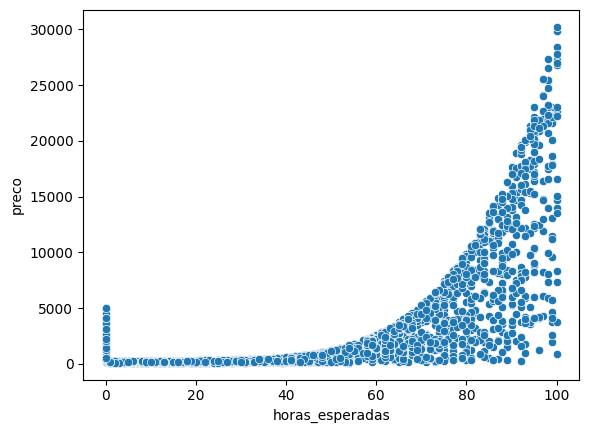

In [168]:
import seaborn as sns
sns.scatterplot(x = "horas_esperadas", y = "preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

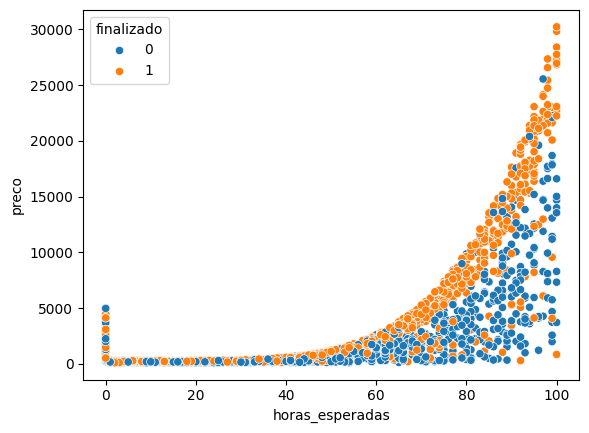

In [169]:
sns.scatterplot(x = "horas_esperadas", y = "preco", data=dados, hue="finalizado")

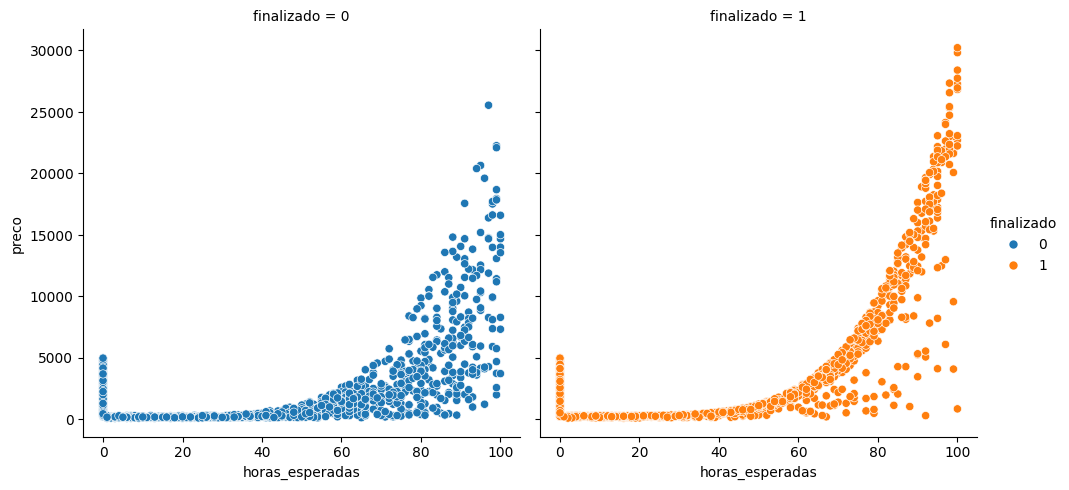

In [170]:
sns.relplot(x = "horas_esperadas", y = "preco", data=dados, hue="finalizado", col="finalizado")

*Analise dos Graficos:*

No gráfico de **projetos finalizados** é possivel ver que quem paga bem para uma quantidade de horas elevadas tem uma taxa de sucesso maior, estando claro pela concentração de projetos com um invetimento maior.

No gráfico de **não finalizado**, é visivel que ocorre o oposto sendo uma concentração maior de projetos com pouco investimentos para a quantidade de horas trabalhadas.

In [171]:
# jogando fora dados sem valor para a analize
dados = dados.query("horas_esperadas > 0")
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


## Utilizando o modelo Linear SVC para analise e previsão dos dados.

In [172]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]


SEED =1680
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,random_state=SEED, stratify=y)
print(f"Treinaremos com {len(treino_x)} elementos")
print(f"testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracy = accuracy_score(teste_y,previsoes)*100
print(f"Acuracia: {acuracy:.2f}%")

Treinaremos com 1617 elementos
testaremos com 540 elementos
Acuracia: 57.59%


In [173]:
previsoes_de_base = teste_y.sum() / len(teste_y) * 100
print(f"Acuracia de base: {previsoes_de_base:.2f}%")

Acuracia de base: 52.59%


In [174]:
x_minimo=teste_x["horas_esperadas"].min()
x_maximo=teste_x["horas_esperadas"].max()
y_minimo=teste_x["preco"].min()
y_maximo=teste_x["preco"].max()
print(f"X minimo: {x_minimo}")
print(f"X maximo: {x_maximo}")
print(f"Y minimo: {y_minimo}")
print(f"Y maximo: {y_maximo}")

X minimo: 1.0
X maximo: 100.0
Y minimo: 101.0
Y maximo: 26952.0


In [175]:
import numpy as np

pixels = 100

eixo_x = np.arange(x_minimo, x_maximo, (x_maximo - x_minimo) / pixels)
eixo_y = np.arange(y_minimo, y_maximo, (y_maximo - y_minimo) / pixels)


In [176]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.668349e+04],
       [9.802000e+01, 2.668349e+04],
       [9.901000e+01, 2.668349e+04]])

In [177]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

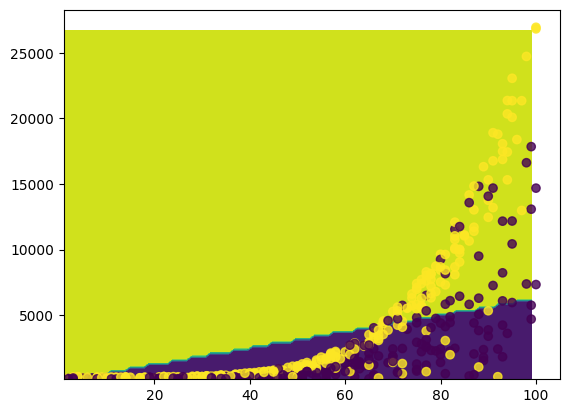

In [178]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c = teste_y, alpha = 0.8)

## Utilizando modelo SVC para prever mais precisamente a curva da base de dados

In [179]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]


SEED =1222
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,random_state=SEED, stratify=y)
print(f"Treinaremos com {len(raw_treino_x)} elementos")
print(f"testaremos com {len(raw_teste_x)} elementos")
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracy = accuracy_score(teste_y,previsoes)*100
print(f"Acuracia: {acuracy:.2f}%")

previsoes_de_base = teste_y.sum() / len(teste_y) * 100
print(f"Acuracia de base: {previsoes_de_base:.2f}%")


Treinaremos com 1617 elementos
testaremos com 540 elementos
Acuracia: 70.74%
Acuracia de base: 52.59%


X minimo: -1.7278793291712964
X maximo: 1.725139916215741
Y minimo: -0.5987370549390569
Y maximo: 4.590548882988529


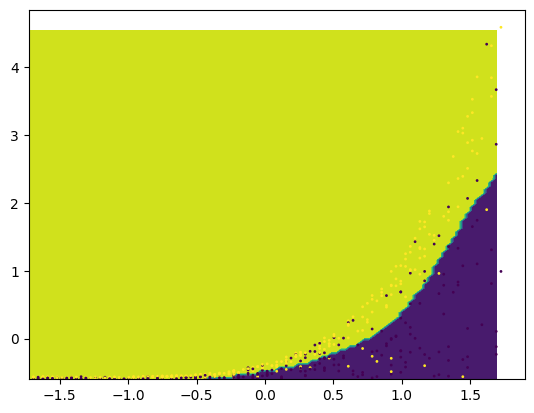

In [180]:
data_col1 = teste_x[:,0]
data_col2 = teste_x[:,1]

x_minimo=data_col1.min()
x_maximo=data_col1.max()
y_minimo=data_col2.min()
y_maximo=data_col2.max()
print(f"X minimo: {x_minimo}")
print(f"X maximo: {x_maximo}")
print(f"Y minimo: {y_minimo}")
print(f"Y maximo: {y_maximo}")

pixels = 100

eixo_x = np.arange(x_minimo, x_maximo, (x_maximo - x_minimo) / pixels)
eixo_y = np.arange(y_minimo, y_maximo, (y_maximo - y_minimo) / pixels)

xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

plt.contourf(xx, yy, Z)
plt.scatter(data_col1, data_col2, c = teste_y, s=1)

# Novo Projeto: Preços


## Tratamento dos dados

In [181]:
import pandas as pd
dados = pd.read_csv('precos.csv')
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [182]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [183]:
from datetime import datetime
dados["idade"] = datetime.today().year - dados["ano_do_modelo"]
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,25
1,7843,1998,40557.96,1,12622.05362,27
2,7109,2006,89627.50,0,11440.79806,19
3,26823,2015,95276.14,0,43167.32682,10
4,7935,2014,117384.68,1,12770.11290,11


In [184]:
dados.drop(columns=["milhas_por_ano", "ano_do_modelo"], inplace=True)
dados.head()

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,25
1,40557.96,1,12622.05362,27
2,89627.50,0,11440.79806,19
3,95276.14,0,43167.32682,10
4,117384.68,1,12770.11290,11


In [185]:
total_vedas = len(dados.query("vendido == True"))/ len(dados)
print(f"Porcentagem da quantidade de carros que foram vendidos de toda a base {(total_vedas)*100:.2f}%")

Porcentagem da quantidade de carros que foram vendidos de toda a base 58.00%


## Modelos Utilizados

### Dummy Classifier

O objetivo principal do Dummy Classifier é fornecer um ponto de comparação. Se um modelo mais complexo não conseguir superar o desempenho do Dummy Classifier, isso pode indicar que o modelo não está aprendendo nada útil a partir dos dados.

In [186]:
x= dados[["preco", "idade", "km_por_ano"]]
y= dados["vendido"]

In [187]:
from sklearn.dummy import DummyClassifier

SEED =1222
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,random_state=SEED, stratify=y)

print(f"Treinaremos com {len(raw_treino_x)} elementos")
print(f"testaremos com {len(raw_teste_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
dummy = DummyClassifier(strategy='stratified')
dummy.fit(raw_treino_x, treino_y)
previsoes = dummy.predict(raw_teste_x)
acuracy = accuracy_score(teste_y,previsoes)*100
print(f"Acuracia: {acuracy:.2f}%")

Treinaremos com 7500 elementos
testaremos com 2500 elementos
Acuracia: 52.92%


### MODELO SVC

Modelo de treino que divide os dados em mais do que apenas duas partes igual o Linear SVC

In [188]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

SEED =1222
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,random_state=SEED, stratify=y)

print(f"Treinaremos com {len(raw_treino_x)} elementos")
print(f"testaremos com {len(raw_teste_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracy = accuracy_score(teste_y,previsoes)*100
print(f"Acuracia: {acuracy:.2f}%")


Treinaremos com 7500 elementos
testaremos com 2500 elementos
Acuracia: 77.16%


### Arvore de decisão

**Utilização do modelo de arvore de decisão do sklearn:**
Acuracia de 70.96%

In [189]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

SEED =1222
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,random_state=SEED, stratify=y)

print(f"Treinaremos com {len(treino_x)} elementos")
print(f"testaremos com {len(teste_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo =DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracy = accuracy_score(teste_y,previsoes)*100
print(f"Acuracia: {acuracy:.2f}%")


Treinaremos com 7500 elementos
testaremos com 2500 elementos
Acuracia: 78.84%


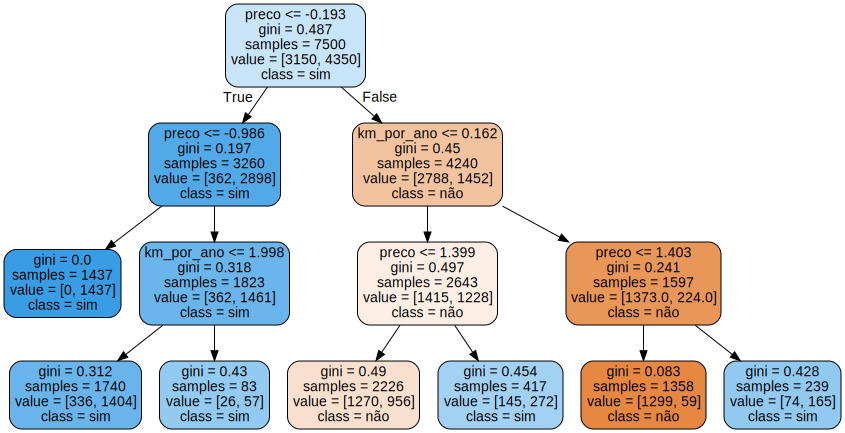

In [190]:
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(modelo, feature_names=x.columns, filled=True, rounded=True, class_names=["não", "sim"])
grafico = graphviz.Source(estrutura)
grafico